# Data Import

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('microbiology_events_codes_3.csv')

In [3]:
df.columns

Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
       'test_name', 'org_name', 'ab_name', 'dilution_text',
       'dilution_comparison', 'dilution_value', 'interpretation',
       'technician_id', 'qc_flag'],
      dtype='object')

In [4]:
df

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_077,QC_OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,Staph aureus swab,Staph aureus Screen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,NaN,NaN,TECH_086,QC_OK
15584,19997667,20372003.0,2144-09-21 00:00:00,2144-09-21 20:14:00,URINE,URINE CULTURE,PSEUDOMONAS AERUGINOSA,MEROPENEM,8,=,8.0,I,TECH_115,QC_FAIL
15585,19997668,20329436.0,2129-08-12 00:00:00,2129-08-12 15:56:00,CATHETER TIP-IV,WOUND CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_061,QC_OK


In [87]:
orignial_data = df.copy()

### Drop Column

In [5]:
# dropped_df = df.drop(columns=['subject_id', 'hadm_id', 'chartdate', 'charttime', 'technician_id'])
dropped_df = df.drop(columns=['dilution_text', 'dilution_comparison'])

In [6]:
# dropped_df.describe()

### Data Cleaning

##### Duplicates: Only 1 Duplicate found.

In [7]:
removed = dropped_df[dropped_df.duplicated(keep='first')]
df_cleaned = dropped_df.drop_duplicates(keep='first')

In [8]:
removed

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
2455,11823798,23491105.0,2186-07-16 00:00:00,2186-07-16 00:25:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,TECH_120,QC_OK


In [9]:
df_cleaned

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,TECH_077,QC_OK
...,...,...,...,...,...,...,...,...,...,...,...,...
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,Staph aureus swab,Staph aureus Screen,NaN,NaN,NaN,NaN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,TECH_086,QC_OK
15584,19997667,20372003.0,2144-09-21 00:00:00,2144-09-21 20:14:00,URINE,URINE CULTURE,PSEUDOMONAS AERUGINOSA,MEROPENEM,8.0,I,TECH_115,QC_FAIL
15585,19997668,20329436.0,2129-08-12 00:00:00,2129-08-12 15:56:00,CATHETER TIP-IV,WOUND CULTURE,NaN,NaN,NaN,NaN,TECH_061,QC_OK


##### Check for Whitespaces, Removing Whitespaces

In [10]:
# detect string columns
str_cols = df_cleaned.select_dtypes(include=['object']).columns
str_cols

Index(['chartdate', 'charttime', 'spec_type_desc', 'test_name', 'org_name',
       'ab_name', 'interpretation', 'technician_id', 'qc_flag'],
      dtype='object')

In [11]:
# show rows that will change
changed = df_cleaned[df_cleaned[str_cols].apply(lambda x: x != x.str.strip()).any(axis=1)]
# Modified rows before cleanup:
changed

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,TECH_077,QC_OK
...,...,...,...,...,...,...,...,...,...,...,...,...
15579,19997662,29338106.0,2182-08-22 00:00:00,2182-08-22 09:09:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,TECH_082,QC_OK
15581,19997664,25289714.0,2186-01-02 00:00:00,2186-01-02 03:40:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_049,QC_OK
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,Staph aureus swab,Staph aureus Screen,NaN,NaN,NaN,NaN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,TECH_086,QC_OK


In [12]:
# clean whitespace
df_cleaned.loc[:, str_cols] = df_cleaned[str_cols].apply(lambda x: x.str.strip())
df_cleaned

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,TECH_077,QC_OK
...,...,...,...,...,...,...,...,...,...,...,...,...
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,Staph aureus swab,Staph aureus Screen,NaN,NaN,NaN,NaN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,TECH_086,QC_OK
15584,19997667,20372003.0,2144-09-21 00:00:00,2144-09-21 20:14:00,URINE,URINE CULTURE,PSEUDOMONAS AERUGINOSA,MEROPENEM,8.0,I,TECH_115,QC_FAIL
15585,19997668,20329436.0,2129-08-12 00:00:00,2129-08-12 15:56:00,CATHETER TIP-IV,WOUND CULTURE,NaN,NaN,NaN,NaN,TECH_061,QC_OK


#### Fix data types

##### Convert chartdate, charttime → datetime

In [13]:
df_cleaned.loc[:, 'chartdate'] = pd.to_datetime(df_cleaned['chartdate'], errors='coerce')

##### Convert dilution_value → numeric (float)

In [14]:
df_cleaned.loc[:, 'dilution_value'] = pd.to_numeric(df_cleaned['dilution_value'], errors='coerce')

##### Ensure categorical columns (spec_type_desc, test_name, interpretation) are strings.

In [16]:
import numpy as np

# Apply cleaning only to object (string) columns
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned.loc[:, col] = (
        df_cleaned.loc[:, col]
        .astype(str)  # ensure it's string
        .str.replace(r'\\xa0', ' ', regex=True)  # literal "\xa0"
        .str.replace(u'\xa0', ' ', regex=False)  # actual unicode non-breaking space
        .str.replace(r'[\t\n\r]+', ' ', regex=True)  # remove tabs/newlines
        .str.replace(r'[^\x00-\x7F]+', '', regex=True)  # remove non-ASCII
        .replace({'': np.nan})  # replace empty strings with NaN
    )

##### Convert Them All to Strings

In [18]:
categorical_cols = ['spec_type_desc', 'test_name', 'interpretation', 'org_name', 'technician_id', 'qc_flag']

for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned.loc[:, col] = df_cleaned[col].astype('string').str.strip()

##### Normalizing Case for Consistency

In [20]:
df_cleaned.loc[:, categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.upper())

#### Rough Work

In [21]:
df_cleaned

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NAN,nan,NaN,NAN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NAN,nan,NaN,NAN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,LEGIONELLA URINARY ANTIGEN,NAN,nan,NaN,NAN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NAN,nan,NaN,NAN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NAN,nan,NaN,NAN,TECH_077,QC_OK
...,...,...,...,...,...,...,...,...,...,...,...,...
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,STAPH AUREUS SWAB,STAPH AUREUS SCREEN,NAN,nan,NaN,NAN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"BLOOD CULTURE, ROUTINE",NAN,nan,NaN,NAN,TECH_086,QC_OK
15584,19997667,20372003.0,2144-09-21 00:00:00,2144-09-21 20:14:00,URINE,URINE CULTURE,PSEUDOMONAS AERUGINOSA,MEROPENEM,8.0,I,TECH_115,QC_FAIL
15585,19997668,20329436.0,2129-08-12 00:00:00,2129-08-12 15:56:00,CATHETER TIP-IV,WOUND CULTURE,NAN,nan,NaN,NAN,TECH_061,QC_OK


#### Analysis Done

In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15586 entries, 0 to 15586
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      15586 non-null  int64  
 1   hadm_id         15586 non-null  float64
 2   chartdate       15586 non-null  object 
 3   charttime       15586 non-null  object 
 4   spec_type_desc  15586 non-null  object 
 5   test_name       15586 non-null  object 
 6   org_name        15586 non-null  object 
 7   ab_name         15586 non-null  object 
 8   dilution_value  4711 non-null   float64
 9   interpretation  15586 non-null  object 
 10  technician_id   15586 non-null  object 
 11  qc_flag         15586 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [39]:
df_cleaned.describe(include='all')

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
count,1.558600e+04,1.558600e+04,15586,15586,15586,15586,15586,15586,4711.000000,15586,15586,15586
unique,NaN,NaN,4648,7709,42,90,83,28,NaN,4,120,3
top,NaN,NaN,2185-01-09 00:00:00,2185-01-09 10:55:00,URINE,URINE CULTURE,NAN,nan,NaN,NAN,TECH_037,QC_OK
freq,NaN,NaN,48,34,4951,4795,10195,10766,NaN,10766,172,13235
mean,1.522120e+07,2.503479e+07,NaN,NaN,NaN,NaN,NaN,NaN,7.062420,NaN,NaN,NaN
std,2.910205e+06,2.846429e+06,NaN,NaN,NaN,NaN,NaN,NaN,21.245298,NaN,NaN,NaN
min,1.000098e+07,2.000790e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,NaN,NaN,NaN
25%,1.266277e+07,2.266230e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN
50%,1.519823e+07,2.514649e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,1.772189e+07,2.743116e+07,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


##### Check for all string-looking empties across all columns

In [38]:
df_cleaned.describe(include = "all")

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
count,1.558600e+04,1.558600e+04,15586,15586,15586,15586,15586,15586,4711.000000,15586,15586,15586
unique,NaN,NaN,4648,7709,42,90,83,28,NaN,4,120,3
top,NaN,NaN,2185-01-09 00:00:00,2185-01-09 10:55:00,URINE,URINE CULTURE,NAN,nan,NaN,NAN,TECH_037,QC_OK
freq,NaN,NaN,48,34,4951,4795,10195,10766,NaN,10766,172,13235
mean,1.522120e+07,2.503479e+07,NaN,NaN,NaN,NaN,NaN,NaN,7.062420,NaN,NaN,NaN
std,2.910205e+06,2.846429e+06,NaN,NaN,NaN,NaN,NaN,NaN,21.245298,NaN,NaN,NaN
min,1.000098e+07,2.000790e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,NaN,NaN,NaN
25%,1.266277e+07,2.266230e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN
50%,1.519823e+07,2.514649e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,1.772189e+07,2.743116e+07,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [46]:
for i in df_cleaned.columns:
    print(df_cleaned[i].value_counts())

subject_id
12492737    122
13135946    107
11204646     89
15016682     83
16571922     73
           ... 
15697529      1
15692859      1
15686320      1
15681388      1
19997669      1
Name: count, Length: 2616, dtype: int64
hadm_id
27261448.0    124
22133572.0    107
29675270.0     86
25177313.0     84
21332395.0     66
             ... 
26541852.0      1
20021932.0      1
29836403.0      1
23742800.0      1
28574336.0      1
Name: count, Length: 2454, dtype: int64
chartdate
2185-01-09 00:00:00    48
2118-10-30 00:00:00    47
2199-10-16 00:00:00    40
2154-08-05 00:00:00    39
2163-04-25 00:00:00    37
                       ..
2149-11-21 00:00:00     1
2149-12-15 00:00:00     1
2173-07-30 00:00:00     1
2191-04-19 00:00:00     1
2173-12-18 00:00:00     1
Name: count, Length: 4648, dtype: int64
charttime
2185-01-09 10:55:00    34
2123-09-03 03:30:00    32
2184-08-10 14:43:00    30
2182-07-09 05:52:00    29
2155-08-21 23:41:00    29
                       ..
2144-03-22 19:25:00     1

In [49]:
import pandas as pd

summary = df_cleaned.apply(lambda col: pd.Series({
    "real_NA": col.isna().sum(),
    "str_nan": col.astype(str).str.lower().str.strip().isin(["nan","na","null"]).sum()
}))

summary


,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
real_NA,0,0,0,0,0,0,0,0,10875,0,0,0
str_nan,0,0,0,0,0,0,10195,10766,10875,10766,0,0


In [51]:
summary = df_cleaned.apply(lambda col: pd.Series({
    "real_NA": col.isna().mean() * 100,
    "str_nan": col.astype(str).str.lower().str.strip().isin(["nan","na","null"]).mean() * 100
}))

summary

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_value,interpretation,technician_id,qc_flag
real_NA,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,69.774156,0.000000,0.0,0.0
str_nan,0.0,0.0,0.0,0.0,0.0,0.0,65.411267,69.074811,69.774156,69.074811,0.0,0.0


##### Quick Analysis for Every Column

In [ ]:
df_cleaned['spec_type_desc'].value_counts()

spec_type_desc
URINE                                                       4951
BLOOD CULTURE                                               3375
SPUTUM                                                      1847
MRSA SCREEN                                                 1241
STAPH AUREUS SWAB                                            645
PLEURAL FLUID                                                618
STOOL                                                        581
FLUID,OTHER                                                  449
SWAB                                                         344
TISSUE                                                       206
SEROLOGY/BLOOD                                               161
FLUID RECEIVED IN BLOOD CULTURE BOTTLES                      123
CATHETER TIP-IV                                              113
BLOOD (EBV)                                                  112
BRONCHOALVEOLAR LAVAGE                                       107
RAPID RESP

In [ ]:
df_cleaned['ab_name'].value_counts()

ab_name
nan                     10766
GENTAMICIN                453
TRIMETHOPRIM/SULFA        389
TOBRAMYCIN                287
CEFTAZIDIME               285
CIPROFLOXACIN             284
MEROPENEM                 283
CEFEPIME                  282
NITROFURANTOIN            261
CEFTRIAXONE               248
PIPERACILLIN/TAZO         223
AMPICILLIN                206
AMPICILLIN/SULBACTAM      201
CEFAZOLIN                 197
TETRACYCLINE              186
LEVOFLOXACIN              173
OXACILLIN                 171
VANCOMYCIN                169
ERYTHROMYCIN              153
CLINDAMYCIN               146
RIFAMPIN                   57
PIPERACILLIN               41
CEFUROXIME                 36
PENICILLIN G               35
AMIKACIN                   27
LINEZOLID                  14
IMIPENEM                    9
DAPTOMYCIN                  4
Name: count, dtype: int64

##### Checking Subject id Duplicates

##### Per Patient review

In [57]:
visits_per_patient = df_cleaned.groupby("subject_id")["hadm_id"].nunique()
visits_per_patient.head()

subject_id
10000980    1
10002155    1
10007058    1
10013569    1
10017531    1
Name: hadm_id, dtype: int64

In [82]:
patient_summary = df_cleaned.groupby("subject_id").apply(
    lambda g: pd.Series({
        "total_records": len(g),
        "total_visits": int(g["hadm_id"].dropna().nunique()),
        "visit_ids": sorted(g["hadm_id"].dropna().unique().tolist()),
        "tests_done": sorted(g["test_name"].unique()),
        "organisms_found": sorted(g["org_name"].unique()),
        "antibiotics_tested": sorted(g["ab_name"].unique()),
        "resistance_outcomes": sorted(g["interpretation"].unique())
    })
)
patient_summary.sort_values(by="total_records", ascending=False).head()

,total_records,total_visits,visit_ids,tests_done,organisms_found,antibiotics_tested,resistance_outcomes
subject_id,,,,,,,
12492737,122,1,[27261448.0],"[AEROBIC BOTTLE GRAM STAIN, BLOOD CULTURE, ROU...","[ESCHERICHIA COLI, KLEBSIELLA PNEUMONIAE, NAN,...","[AMPICILLIN, AMPICILLIN/SULBACTAM, CEFAZOLIN, ...","[NAN, S]"
13135946,107,1,[22133572.0],"[AEROBIC BOTTLE GRAM STAIN, BLOOD CULTURE, ROU...","[ENTEROBACTER CLOACAE COMPLEX, GRAM NEGATIVE R...","[AMPICILLIN/SULBACTAM, CEFAZOLIN, CEFEPIME, CE...","[I, NAN, R, S]"
11204646,89,2,"[21601338.0, 29675270.0]","[AEROBIC BOTTLE GRAM STAIN, ANAEROBIC BOTTLE G...","[ENTEROBACTER CLOACAE, NAN, SERRATIA MARCESCEN...","[CEFEPIME, CEFTAZIDIME, CEFTRIAXONE, CIPROFLOX...","[NAN, R, S]"
15016682,83,1,[25177313.0],"[AEROBIC BOTTLE GRAM STAIN, BLOOD CULTURE, ROU...","[NAN, STAPHYLOCOCCUS, COAGULASE NEGATIVE]","[CLINDAMYCIN, ERYTHROMYCIN, GENTAMICIN, LEVOFL...","[I, NAN, R, S]"
16571922,73,2,"[22202396.0, 29072327.0]","[ACID FAST CULTURE, ACID FAST SMEAR, ANAEROBIC...","[ENTEROCOCCUS SP., KLEBSIELLA PNEUMONIAE, NAN]","[AMPICILLIN, AMPICILLIN/SULBACTAM, CEFAZOLIN, ...","[NAN, R, S]"


In [86]:
dfc = df_cleaned.copy()
dfc["hadm_id"] = pd.to_numeric(dfc["hadm_id"], errors="coerce")

admission_summary = dfc.groupby(["subject_id", "hadm_id"]).agg({
    "charttime": ["min", "max"],
    "spec_type_desc": lambda x: sorted(x.unique()),
    "test_name": lambda x: sorted(x.unique()),
    "org_name": lambda x: sorted(x.unique()),
    "ab_name": lambda x: sorted(x.unique()),
    "interpretation": lambda x: sorted(x.unique())
})
admission_summary.tail()

charttime                       \
                                       min                  max   
subject_id hadm_id                                                
19997665   26052266.0  2173-11-09 18:09:00  2173-11-09 18:09:00   
19997666   24256422.0  2168-08-03 22:00:00  2168-08-03 22:00:00   
19997667   20372003.0  2144-09-21 20:14:00  2144-09-21 20:14:00   
19997668   20329436.0  2129-08-12 15:56:00  2129-08-12 15:56:00   
19997669   28219199.0  2160-07-03 15:39:00  2160-07-03 15:39:00   

                            spec_type_desc                 test_name  \
                                  <lambda>                  <lambda>   
subject_id hadm_id                                                     
19997665   26052266.0  [STAPH AUREUS SWAB]     [STAPH AUREUS SCREEN]   
19997666   24256422.0      [BLOOD CULTURE]  [BLOOD CULTURE, ROUTINE]   
19997667   20372003.0              [URINE]           [URINE CULTURE]   
19997668   20329436.0    [CATHETER TIP-IV]           [WOUND CULTURE]   
19997669   28219199.0              [URINE]           [URINE CULTURE]   

                                       org_name               ab_name  \
                                       <lambda>              <lambda>   
subject_id hadm_id                                                      
19997665   26052266.0                     [NAN]                 [nan]   
19997666   24256422.0                     [NAN]                 [nan]   
19997667   20372003.0  [PSEUDOMONAS AERUGINOSA]           [MEROPENEM]   
19997668   20329436.0                     [NAN]                 [nan]   
19997669   28219199.0   [KLEBSIELLA PNEUMONIAE]  [TRIMETHOPRIM/SULFA]   

                      interpretation  
                            <lambda>  
subject_id hadm_id                    
19997665   26052266.0          [NAN]  
19997666   24256422.0          [NAN]  
19997667   20372003.0            [I]  
19997668   20329436.0          [NAN]  
19997669   28219199.0            [S]

##### In-Depth Analysis - A — Patient / admission level (clinical relevance) 

In [ ]:
import pandas as pd
import numpy as np

df = df_cleaned.copy()

# Parse datetime
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce', dayfirst=True)  # adapt if needed
# If chartdate exists and charttime is string, ignore chartdate as you said.

# Standardize interpretation
df['interpretation'] = df['interpretation'].astype(str).str.strip().str.upper()
df['interpretation'] = df['interpretation'].replace({
    'SENSITIVE':'S','SENS':'S','SENSITIVE ':'S','SENS ':'S',
    'RESISTANT':'R','RESIST':'R','INTERMEDIATE':'I','INDETERMINATE':'NA',
    'NAN':'NA','NONE':'NA','': 'NA'
})
df.loc[~df['interpretation'].isin(['S','I','R']), 'interpretation'] = np.nan

# dilution_value numeric (force float)
df['dilution_value'] = pd.to_numeric(df['dilution_value'], errors='coerce')

# Normalize names (trim, uppercase)
for c in ['spec_type_desc','test_name','org_name','ab_name','qc_flag','technician_id']:
    df[c] = df[c].astype(str).str.strip().str.upper().replace({'NAN': np.nan, 'NONE': np.nan})

C:\Users\aksha\AppData\Local\Temp\ipykernel_26168\1086485419.py:7: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce', dayfirst=True)  # adapt if needed


In [91]:
df['has_dilution'] = ~df['dilution_value'].isna()
df['has_ab'] = ~df['ab_name'].isna()
df['has_org'] = ~df['org_name'].isna()

In [92]:
print("patients:", df['subject_id'].nunique())
print("admissions:", df['hadm_id'].nunique())
print("specimens:", df['spec_type_desc'].nunique())
print("organisms:", df['org_name'].nunique())
print("antibiotics:", df['ab_name'].nunique())

missing = df.isna().mean().sort_values(ascending=False)
print(missing)

# top organisms
df['org_name'].value_counts().head(20)

# interpretation distribution
df['interpretation'].value_counts(dropna=False)


patients: 2616
admissions: 2454
specimens: 42
organisms: 82
antibiotics: 27
dilution_value    0.697742
ab_name           0.690748
interpretation    0.690748
org_name          0.654113
subject_id        0.000000
hadm_id           0.000000
chartdate         0.000000
charttime         0.000000
spec_type_desc    0.000000
test_name         0.000000
technician_id     0.000000
qc_flag           0.000000
has_dilution      0.000000
has_ab            0.000000
has_org           0.000000
dtype: float64


interpretation
NaN    10766
S       3807
R        856
I        157
Name: count, dtype: int64

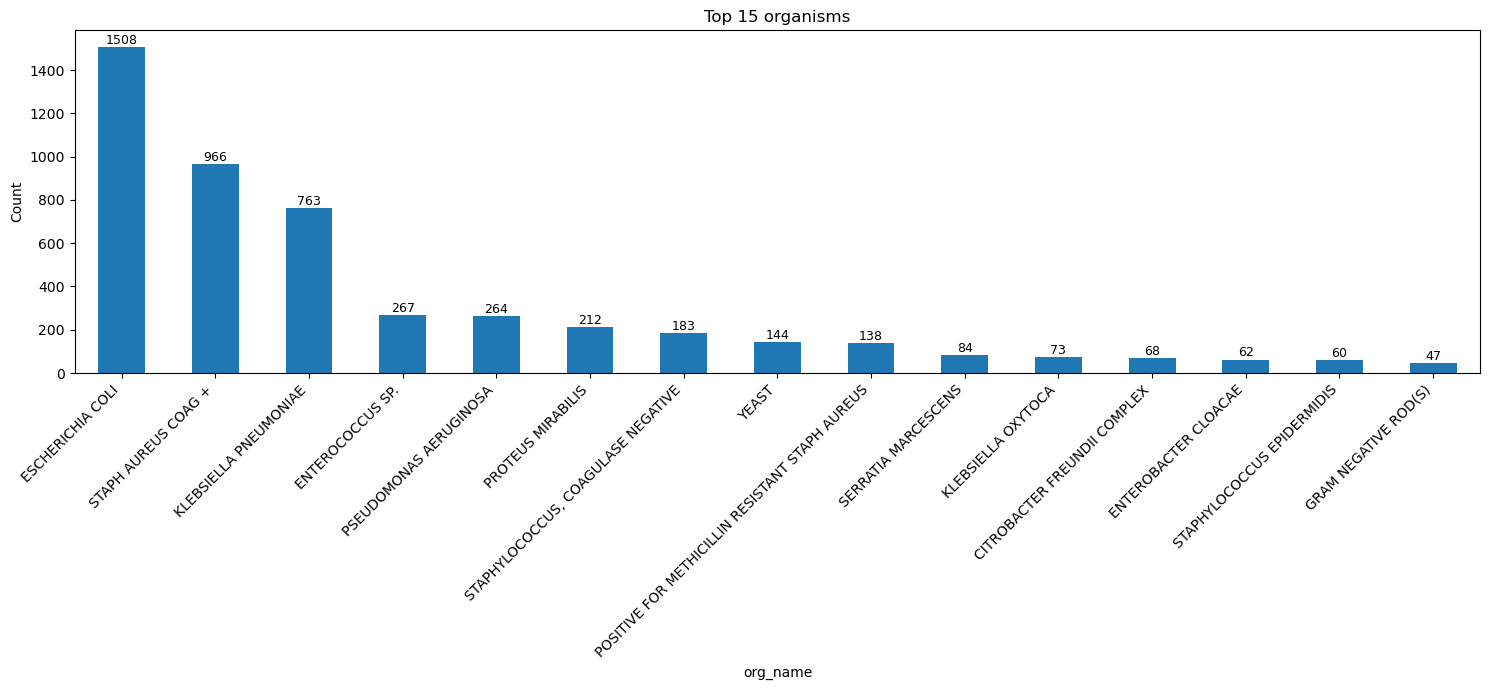

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# top organisms
top_orgs = df['org_name'].value_counts().nlargest(15)
ax = top_orgs.plot(kind='bar', figsize=(15,7))

plt.title('Top 15 organisms')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add labels on top of each bar
for i, v in enumerate(top_orgs):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [99]:
# per-admission summary
adm_summary = df.groupby('hadm_id').agg(
    n_records=('charttime','count'),
    first_test=('charttime','min'),
    last_test=('charttime','max'),
    unique_orgs=('org_name', lambda s: s.dropna().nunique()),
    unique_abs=('ab_name', lambda s: s.dropna().nunique())
).reset_index()

adm_summary.sort_values('n_records', ascending=False).head(20)

,hadm_id,n_records,first_test,last_test,unique_orgs,unique_abs
1777,27261448.0,124,2156-08-24 12:52:00,2156-09-20 08:45:00,4,13
501,22133572.0,107,2143-07-29 23:45:00,2143-08-30 15:51:00,9,11
2373,29675270.0,86,2199-09-14 02:14:00,2199-10-29 08:13:00,5,19
1246,25177313.0,84,2138-06-09 23:04:00,2138-06-23 13:32:00,1,8
325,21332395.0,66,2163-07-13 14:54:00,2163-08-21 12:37:00,2,7
696,22874518.0,65,2147-12-18 06:34:00,2147-12-28 01:17:00,2,9
2142,28725090.0,64,2129-04-06 08:48:00,2129-04-13 22:38:00,5,17
2227,29072327.0,63,2185-01-07 17:15:00,2185-01-12 18:09:00,1,12
1866,27614872.0,61,2163-04-20 18:13:00,2163-04-28 17:01:00,3,10
1698,26941902.0,59,2176-02-01 20:30:00,2176-02-21 13:58:00,0,0


In [101]:
adf['charttime']

13978   2176-02-01 20:30:00
13979   2176-02-01 22:00:00
13980   2176-02-02 00:46:00
13981   2176-02-02 11:57:00
13982   2176-02-02 12:29:00
13983   2176-02-02 12:29:00
13984   2176-02-03 02:42:00
13985   2176-02-03 21:35:00
13986   2176-02-03 21:45:00
13987   2176-02-03 22:01:00
13988   2176-02-04 14:23:00
13989   2176-02-05 09:23:00
13990   2176-02-05 09:24:00
13991   2176-02-05 09:25:00
13992   2176-02-05 10:13:00
13993   2176-02-05 10:13:00
13994   2176-02-05 10:13:00
13995   2176-02-05 10:28:00
13996   2176-02-05 10:28:00
13997   2176-02-05 12:36:00
13998   2176-02-06 03:49:00
13999   2176-02-06 03:49:00
14000   2176-02-06 08:06:00
14001   2176-02-06 11:53:00
14002   2176-02-07 12:20:00
14003   2176-02-11 09:55:00
14004   2176-02-12 09:00:00
15393   2176-02-12 09:00:00
14007   2176-02-12 10:13:00
14005   2176-02-12 10:13:00
14006   2176-02-12 10:13:00
14008   2176-02-12 10:14:00
14009   2176-02-15 09:29:00
15318   2176-02-15 10:23:00
14018   2176-02-15 10:23:00
14017   2176-02-15 1

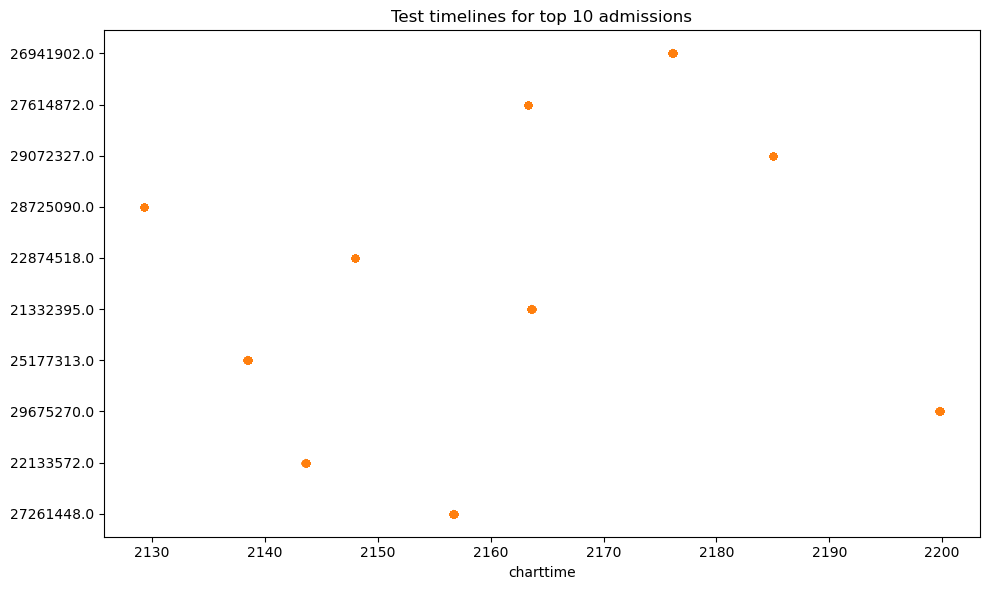

In [124]:
import matplotlib.pyplot as plt
import mplcursors

top_adms = adm_summary.sort_values('n_records', ascending=False).head(10)['hadm_id']

fig, ax = plt.subplots(figsize=(10, 6))

for i, adm in enumerate(top_adms):
    adf = df[df['hadm_id'] == adm].sort_values('charttime')
    if adf.empty:
        continue

    # Horizontal line for the admission
    ax.hlines(i, adf['charttime'].min(), adf['charttime'].max(),
              lw=6, color='tab:blue', alpha=0.5)

    # Scatter points
    sc = ax.scatter(adf['charttime'], [i]*len(adf),
                    s=20, color='tab:orange', zorder=3, label=adm)

ax.set_yticks(range(len(top_adms)))
ax.set_yticklabels(top_adms)
plt.title('Test timelines for top 10 admissions')
plt.xlabel('charttime')
plt.tight_layout()

# 👇 Add this part right before plt.show()
cursor = mplcursors.cursor(ax.collections, hover=True)
@cursor.connect("add")
def on_hover(sel):
    # Get x value (charttime) for hovered point
    x_val = mdates.num2date(sel.target[0]) if hasattr(sel.target[0], '__float__') else sel.target[0]
    sel.annotation.set_text(str(x_val))

plt.show()

Text(0.5, 1.0, 'Antibiogram (percent susceptible) — top organisms & antibiotics')

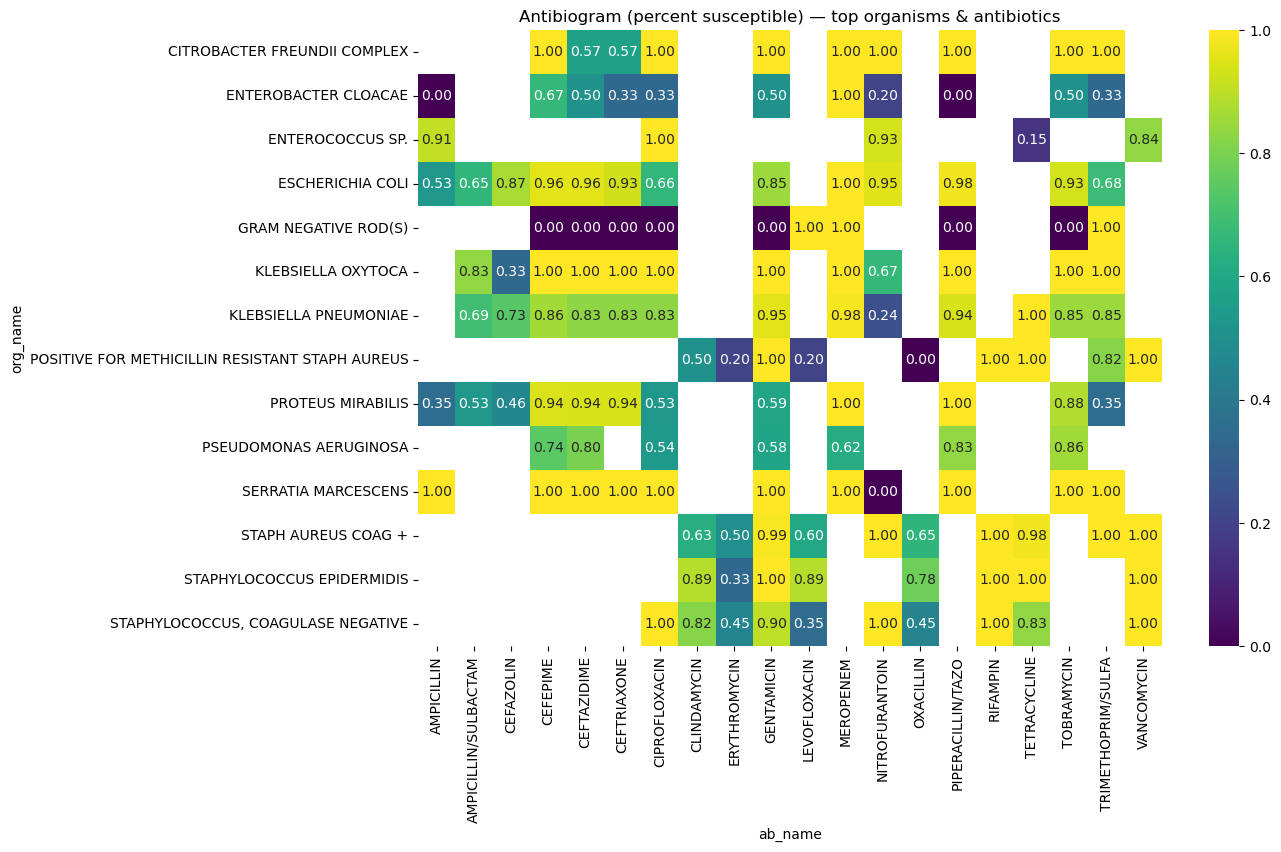

In [107]:
# Filter to organism + antibiotic rows with interpretation
ab_df = df.dropna(subset=['org_name','ab_name','interpretation']).copy()

# pivot counts
pivot = ab_df.groupby(['org_name','ab_name','interpretation']).size().unstack(fill_value=0)
pivot['TOTAL'] = pivot.sum(axis=1)
pivot = pivot.reset_index()

# percent S
pivot['pct_S'] = pivot.get('S',0) / pivot['TOTAL']

# create heatmap matrix organisms x antibiotics (choose top organisms and top antibiotics)
top_orgs = df['org_name'].value_counts().nlargest(15).index
top_abs = df['ab_name'].value_counts().nlargest(20).index

matrix = pivot[pivot['org_name'].isin(top_orgs) & pivot['ab_name'].isin(top_abs)].pivot(
    index='org_name', columns='ab_name', values='pct_S'
)

# Heatmap
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.title('Antibiogram (percent susceptible) — top organisms & antibiotics')


In [108]:
count_matrix = ab_df.groupby(['org_name','ab_name']).size().unstack(fill_value=0)
mask_low = count_matrix < 30
sns.heatmap(matrix, mask=mask_low, annot=True, fmt='.2f')

IndexError: Inconsistent shape between the condition and the input (got (36, 27) and (14, 20))

C:\Users\aksha\AppData\Local\Temp\ipykernel_26168\336819452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel['log2_mic'] = np.log2(sel['dilution_value'].replace(0, np.nan))


Text(0.5, 1.0, 'log2 MIC by antibiotic (colored by organism)')

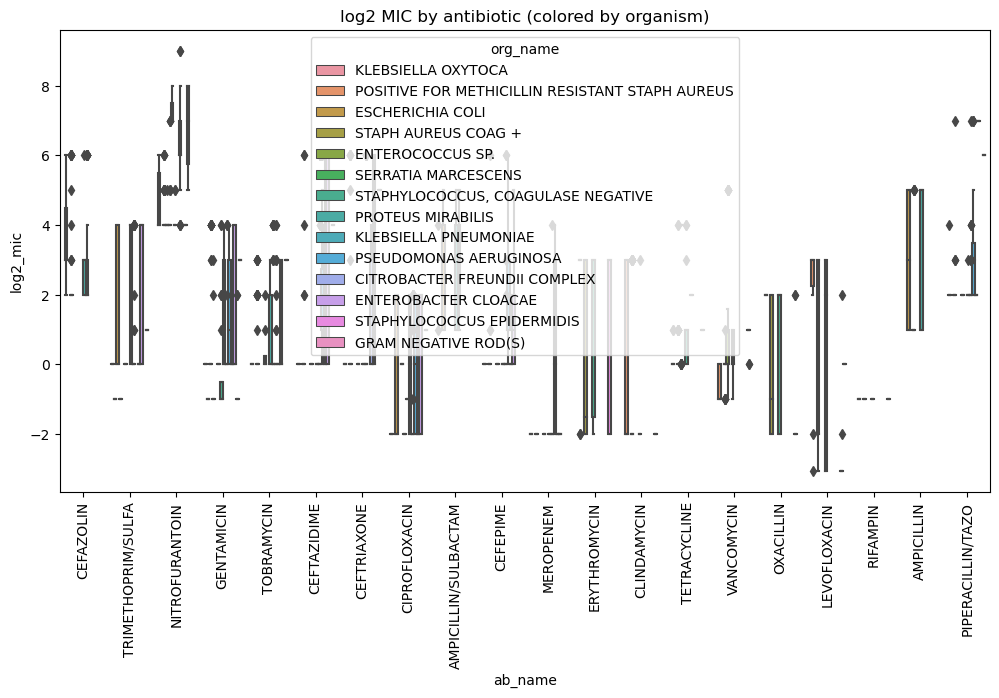

In [109]:
sel = df[(df['org_name'].isin(top_orgs)) & (df['ab_name'].isin(top_abs)) & (~df['dilution_value'].isna())]
sel['log2_mic'] = np.log2(sel['dilution_value'].replace(0, np.nan))
plt.figure(figsize=(12,6))
sns.boxplot(data=sel, x='ab_name', y='log2_mic', hue='org_name')
plt.xticks(rotation=90)
plt.title('log2 MIC by antibiotic (colored by organism)')

Text(0.5, 1.0, 'Monthly percent susceptible by organism')

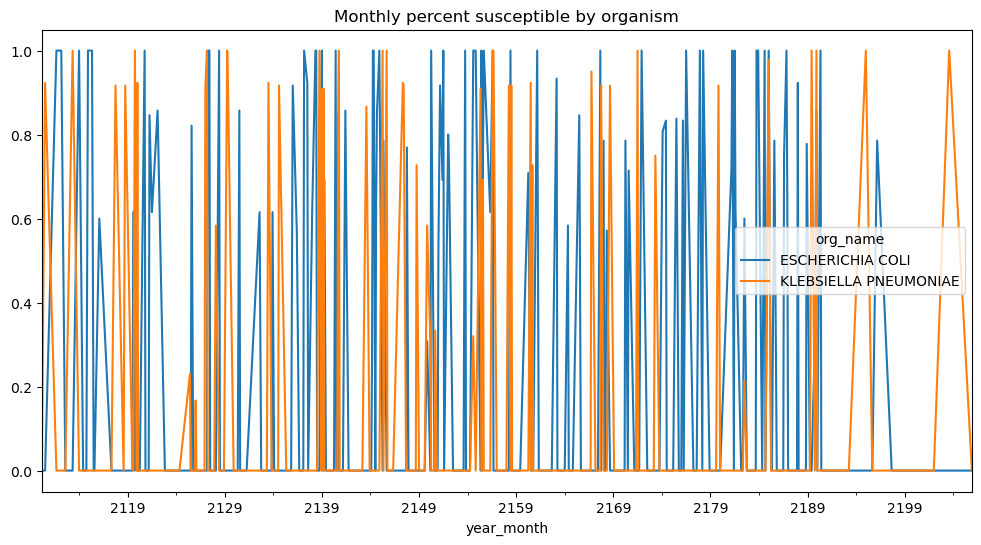

In [113]:
df['year_month'] = df['charttime'].dt.to_period('M')
time_df = ab_df.copy()
time_df['year_month'] = time_df['charttime'].dt.to_period('M')
time_df['is_S'] = (time_df['interpretation']=='S').astype(int)
trend = time_df.groupby(['year_month','org_name'])['is_S'].mean().unstack().fillna(0)

# plot for a few organisms
trend[['ESCHERICHIA COLI','KLEBSIELLA PNEUMONIAE']].plot(figsize=(12,6))
plt.title('Monthly percent susceptible by organism')


In [ ]:
# example: percent susceptible for E. coli in URINE vs BLOOD
sub = ab_df[ab_df['org_name']=='ESCHERICHIA COLI']
sub.groupby(['spec_type_desc','ab_name'])['interpretation'].apply(
    lambda s: (s=='S').sum() / s.notna().sum()
).unstack().loc[['URINE','BLOOD CULTURE']]

ab_name,AMIKACIN,AMPICILLIN,AMPICILLIN/SULBACTAM,CEFAZOLIN,CEFEPIME,CEFTAZIDIME,CEFTRIAXONE,CEFUROXIME,CIPROFLOXACIN,GENTAMICIN,MEROPENEM,NITROFURANTOIN,PIPERACILLIN,PIPERACILLIN/TAZO,TOBRAMYCIN,TRIMETHOPRIM/SULFA
spec_type_desc,,,,,,,,,,,,,,,,
URINE,1.0,0.504854,0.638095,0.857143,0.952381,0.953271,0.92381,0.789474,0.641509,0.849057,1.0,0.952381,0.5,0.97619,0.925926,0.653846
BLOOD CULTURE,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,NaN,1.0,1.00000,1.000000,1.000000


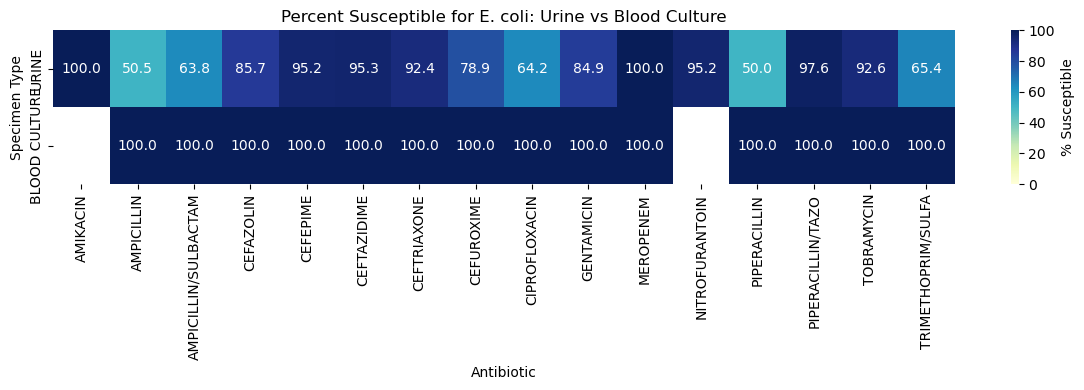

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute percent susceptible
sub = ab_df[ab_df['org_name'] == 'ESCHERICHIA COLI']

suscept = (
    sub.groupby(['spec_type_desc', 'ab_name'])['interpretation']
    .apply(lambda s: (s == 'S').sum() / s.notna().sum() * 100)
    .unstack()
    .loc[['URINE', 'BLOOD CULTURE']]
)

# Plot heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    suscept,
    annot=True, fmt=".1f", cmap="YlGnBu", vmin=0, vmax=100,
    cbar_kws={'label': '% Susceptible'}
)
plt.title("Percent Susceptible for E. coli: Urine vs Blood Culture")
plt.xlabel("Antibiotic")
plt.ylabel("Specimen Type")
plt.tight_layout()
plt.show()


In [127]:
# identify unique isolate events (grouping keys)
keys = ['subject_id','hadm_id','charttime','spec_type_desc','test_name','org_name']
iso = df.dropna(subset=['org_name']).copy()
iso = iso.dropna(subset=['ab_name','interpretation'])  # only rows with ab result
iso['is_R'] = (iso['interpretation']=='R').astype(int)

wide = iso.pivot_table(index=keys, columns='ab_name', values='is_R', aggfunc='max', fill_value=0)
# count common patterns - treat as tuple or binary string
wide['pattern'] = wide.apply(lambda r: ','.join(wide.columns[r==1]), axis=1)
wide['pattern'].value_counts().head(20)


pattern
                                                                294
TETRACYCLINE                                                     43
CLINDAMYCIN,ERYTHROMYCIN,LEVOFLOXACIN,OXACILLIN                  23
ERYTHROMYCIN                                                     13
NITROFURANTOIN                                                   10
ERYTHROMYCIN,LEVOFLOXACIN,OXACILLIN                               9
CLINDAMYCIN,ERYTHROMYCIN                                          9
AMPICILLIN,CIPROFLOXACIN,TRIMETHOPRIM/SULFA                       9
OXACILLIN                                                         8
LEVOFLOXACIN                                                      8
LEVOFLOXACIN,OXACILLIN                                            7
TRIMETHOPRIM/SULFA                                                7
CIPROFLOXACIN                                                     7
CLINDAMYCIN,ERYTHROMYCIN,LEVOFLOXACIN,OXACILLIN,PENICILLIN G      7
AMPICILLIN,CIPROFLOXACIN,GENTAMICIN,TRIM

In [128]:
# QC vs interpretation
qc_table = df.groupby('qc_flag')['interpretation'].value_counts(normalize=True).unstack(fill_value=0)
qc_table

# Technician-level resistant proportion
tech = df.dropna(subset=['interpretation']).groupby('technician_id').apply(
    lambda g: pd.Series({
        'n': len(g),
        'pct_R': (g['interpretation']=='R').mean(),
        'qc_fail_rate': (g['qc_flag']=='QC_FAIL').mean()
    })
).sort_values('n', ascending=False)
tech.head(20)


,n,pct_R,qc_fail_rate
technician_id,,,
TECH_037,55.0,0.200000,0.036364
TECH_040,54.0,0.203704,0.074074
TECH_119,53.0,0.207547,0.018868
TECH_022,53.0,0.150943,0.056604
TECH_091,52.0,0.211538,0.076923
TECH_084,52.0,0.230769,0.057692
TECH_117,52.0,0.153846,0.038462
TECH_109,51.0,0.078431,0.058824
TECH_085,50.0,0.180000,0.040000


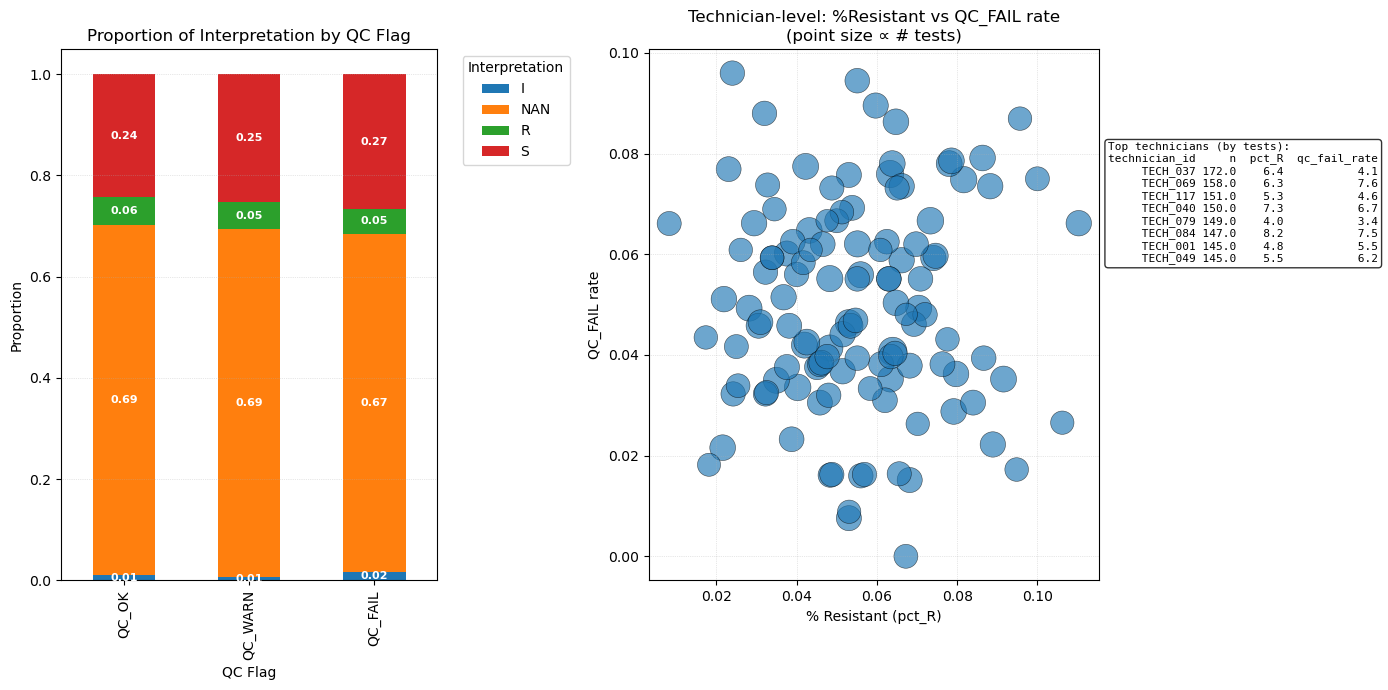

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_qc_and_tech(df,
                     interpretation_col='interpretation',
                     qc_col='qc_flag',
                     tech_col='technician_id',
                     annotate_n_thresh=50,
                     min_point_size=20,
                     figsize=(14,7)):
    """
    Create:
      1) stacked bar: qc_flag x interpretation proportions
      2) scatter: per-technician pct_R (x) vs qc_fail_rate (y), size ~ n tests
         - annotate points where n <= annotate_n_thresh OR total_techs <= 30
    """
    # Defensive copy & prepare
    df_plot = df.copy()
    # Standardize interpretation categories (string)
    df_plot[interpretation_col] = df_plot[interpretation_col].astype(str).str.strip().replace({'nan':'NaN','None':'NaN'})
    # --- QC vs interpretation stacked bar (proportions) ---
    qc_table = (df_plot
                .groupby(qc_col)[interpretation_col]
                .value_counts(normalize=True)
                .unstack(fill_value=0)
               )
    # Sort qc_table rows in a sensible order if those flags exist
    preferred_order = ['QC_OK', 'QC_WARN', 'QC_FAIL']
    qc_index = [i for i in preferred_order if i in qc_table.index] + \
               [i for i in qc_table.index if i not in preferred_order]
    qc_table = qc_table.reindex(qc_index)

    # Plot 1: Stacked bar
    fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios':[1.0, 1.2]})
    ax1 = axes[0]
    # --- Plot 1: Stacked bar ---
    bars = qc_table.plot(kind='bar', stacked=True, ax=ax1, linewidth=0.5)
    ax1.set_title('Proportion of Interpretation by QC Flag')
    ax1.set_xlabel('QC Flag')
    ax1.set_ylabel('Proportion')
    ax1.legend(title='Interpretation', bbox_to_anchor=(1.05,1), loc='upper left')
    ax1.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.6)

    # Add value labels (proportions)
    for container in ax1.containers:
        ax1.bar_label(
            container,
            fmt='%.2f',        # 2 decimal places for proportions
            label_type='center',
            fontsize=8,
            color='white',
            fontweight='bold'
        )

    # --- Technician-level summary ---
    tech = (df_plot
            .dropna(subset=[interpretation_col])
            .groupby(tech_col)
            .apply(lambda g: pd.Series({
                'n': len(g),
                'pct_R': (g[interpretation_col] == 'R').mean(),
                'qc_fail_rate': (g[qc_col] == 'QC_FAIL').mean()
            }))
           ).reset_index()

    # Sort by n for plotting order convenience
    tech = tech.sort_values('n', ascending=False)

    # Prepare sizes (scale by n, keep min size)
    s = (tech['n'] / tech['n'].max()) * 400  # scale factor (tweakable)
    s = s + min_point_size

    # Plot 2: scatter: pct_R vs qc_fail_rate
    ax2 = axes[1]
    scatter = ax2.scatter(tech['pct_R'], tech['qc_fail_rate'], s=s, alpha=0.65, edgecolor='k', linewidth=0.4)

    ax2.set_title('Technician-level: %Resistant vs QC_FAIL rate\n(point size ∝ # tests)')
    ax2.set_xlabel('% Resistant (pct_R)')
    ax2.set_ylabel('QC_FAIL rate')
    ax2.grid(linestyle=':', linewidth=0.5, alpha=0.6)

    # Decide whether to annotate many points or only small-n points
    total_techs = len(tech)
    annotate_all = (total_techs <= 30)
    # Annotate points where n <= threshold OR annotate_all
    for _, row in tech.iterrows():
        x, y, n, tech_id = row['pct_R'], row['qc_fail_rate'], row['n'], row[tech_col]
        if annotate_all or (n <= annotate_n_thresh):
            ax2.annotate(
                str(tech_id),
                xy=(x, y),
                xytext=(4, 3),
                textcoords='offset points',
                fontsize=7,
                alpha=0.9
            )

    # Add small inset table with top technicians (by n)
    topk = 8
    top_table = tech.head(topk)[[tech_col, 'n', 'pct_R', 'qc_fail_rate']].copy()
    top_table['pct_R'] = (top_table['pct_R'] * 100).round(1)
    top_table['qc_fail_rate'] = (top_table['qc_fail_rate'] * 100).round(1)
    # Create table text
    tbl_text = top_table.to_string(index=False)
    ax2.text(1.02, 0.6, 'Top technicians (by tests):\n' + tbl_text,
             transform=ax2.transAxes, fontsize=8, family='monospace',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Return the dataframes in case user wants to inspect
    return {'qc_table': qc_table, 'tech_table': tech}

# Example usage:
results = plot_qc_and_tech(df_cleaned)    # or plot_qc_and_tech(df)
qc_table = results['qc_table']
tech_table = results['tech_table']


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

model_df = df.dropna(subset=['interpretation','org_name','ab_name']).copy()
model_df = model_df[model_df['interpretation'].isin(['S','R'])]
model_df['y'] = (model_df['interpretation']=='R').astype(int)

X = model_df[['org_name','spec_type_desc','ab_name','qc_flag']]
X = pd.get_dummies(X, drop_first=True)
y = model_df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])


0.838054457619675

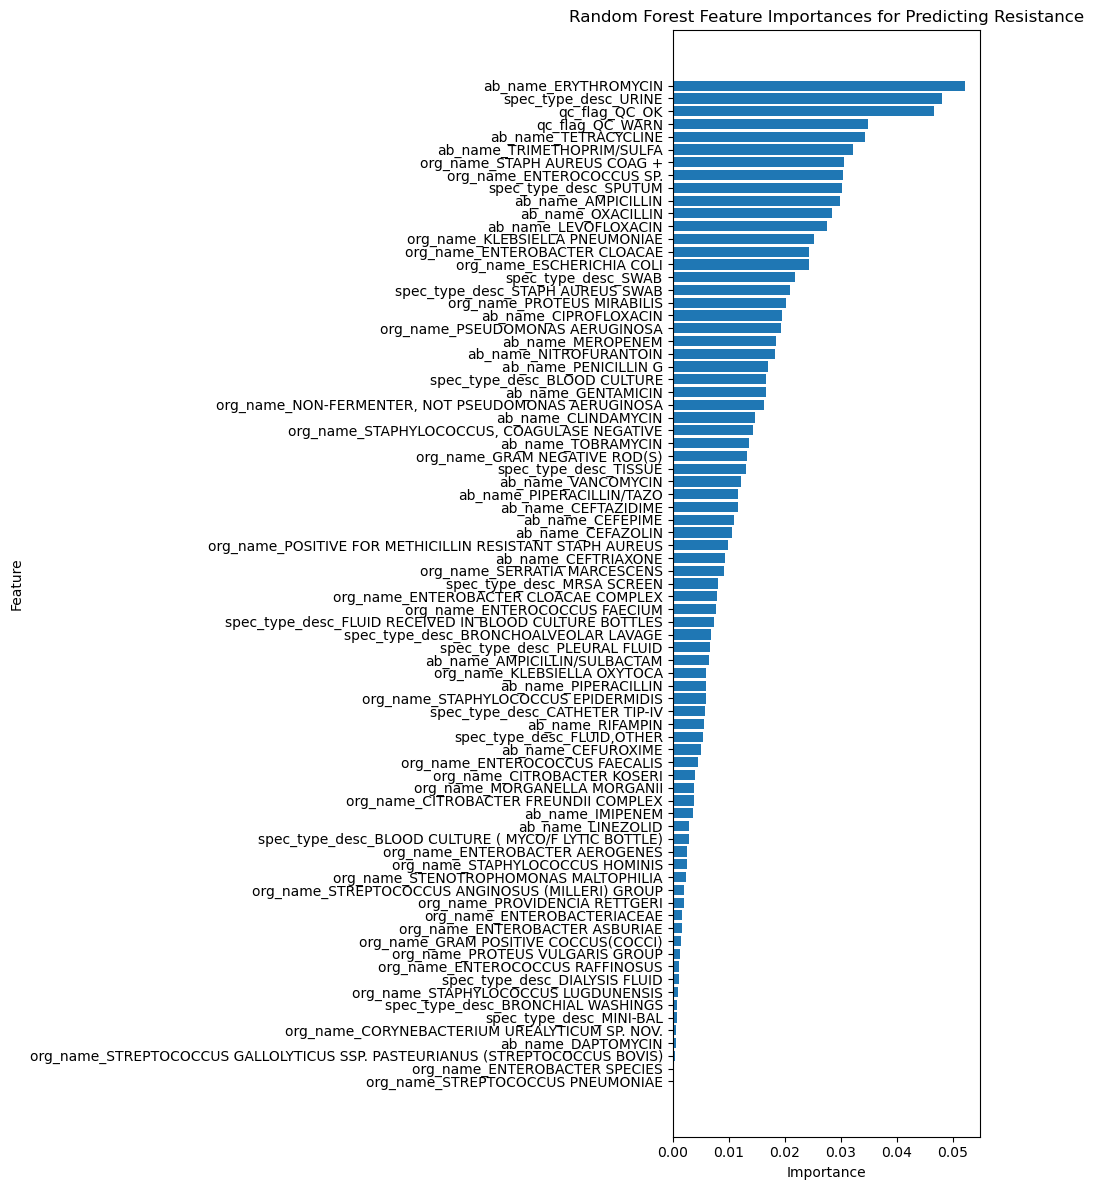

In [136]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
feature_names = X.columns
idx = np.argsort(importances)

plt.figure(figsize=(10,12))
plt.barh(feature_names[idx], importances[idx])
plt.title("Random Forest Feature Importances for Predicting Resistance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


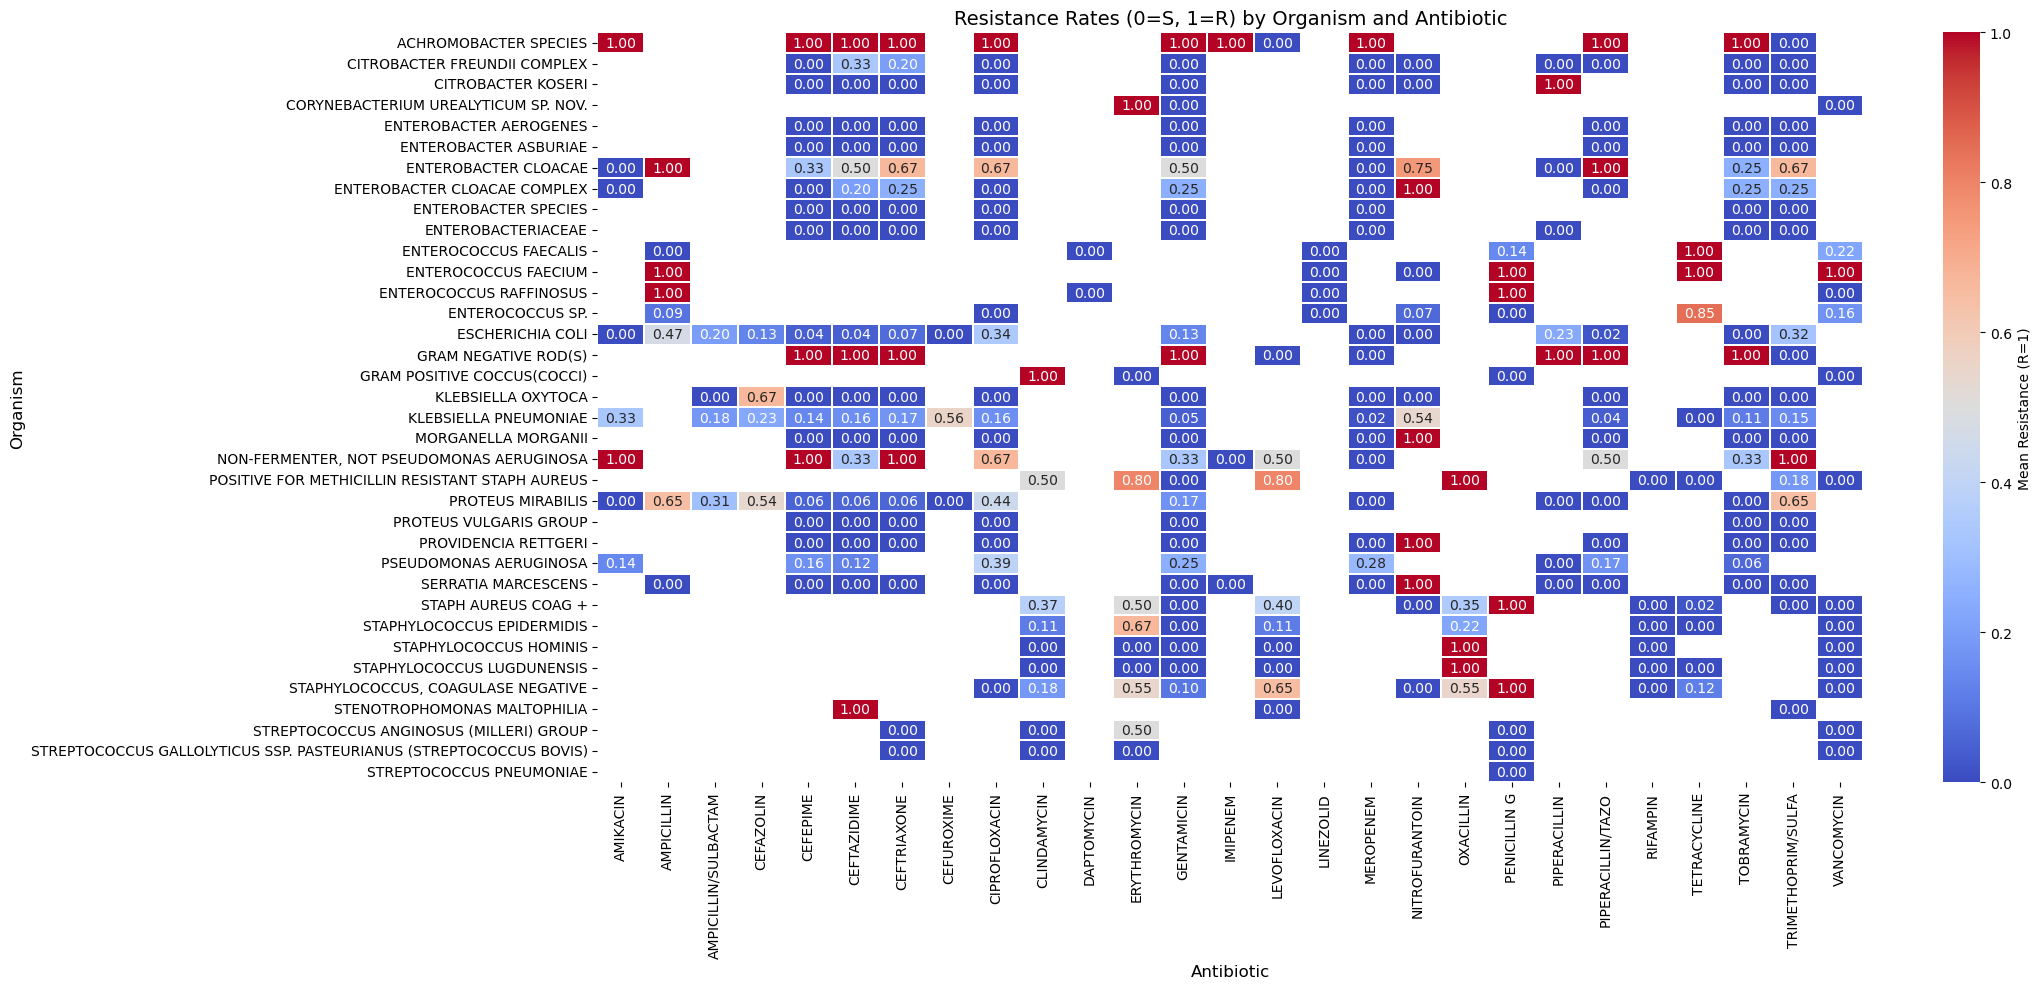

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = model_df.pivot_table(
    index="org_name",
    columns="ab_name",
    values="y",
    aggfunc="mean"
)

plt.figure(figsize=(22,10))
sns.heatmap(
    pivot,
    cmap="coolwarm",
    linewidths=0.1,
    annot=True,          # ✅ add numeric labels in each cell
    fmt=".2f",           # ✅ format with 2 decimal places (e.g. 0.35)
    cbar_kws={'label': 'Mean Resistance (R=1)'}  # optional colorbar label
)

plt.title("Resistance Rates (0=S, 1=R) by Organism and Antibiotic", fontsize=14)
plt.xlabel("Antibiotic", fontsize=12)
plt.ylabel("Organism", fontsize=12)
plt.tight_layout()
plt.show()

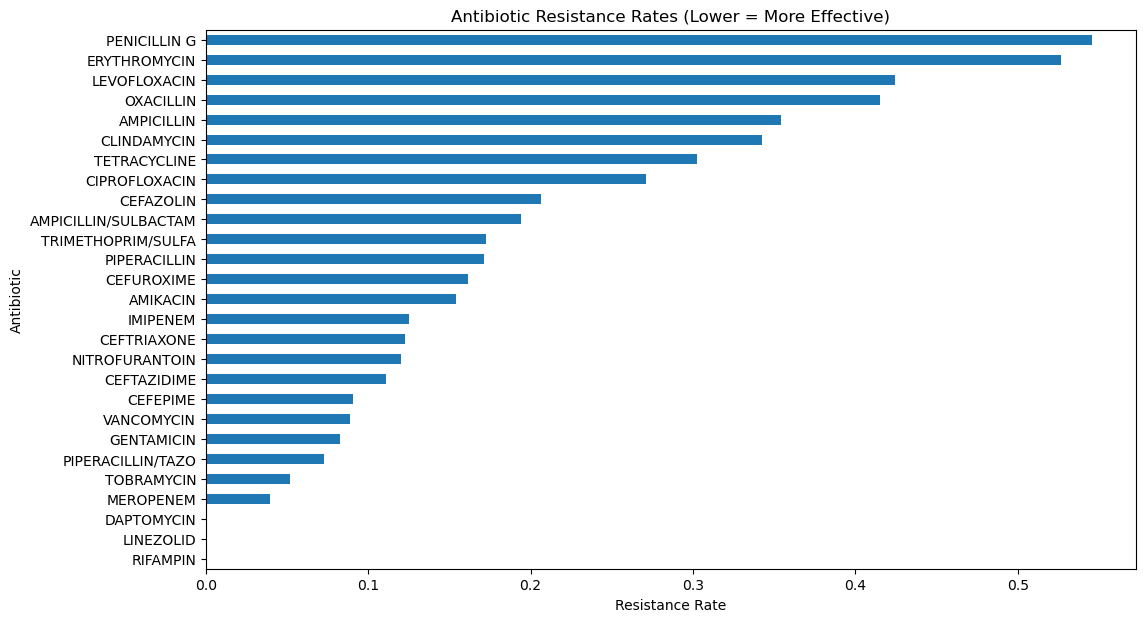

In [139]:
ab_summary = model_df.groupby("ab_name")["y"].mean().sort_values()

plt.figure(figsize=(12,7))
ab_summary.plot(kind="barh")
plt.title("Antibiotic Resistance Rates (Lower = More Effective)")
plt.xlabel("Resistance Rate")
plt.ylabel("Antibiotic")
plt.show()

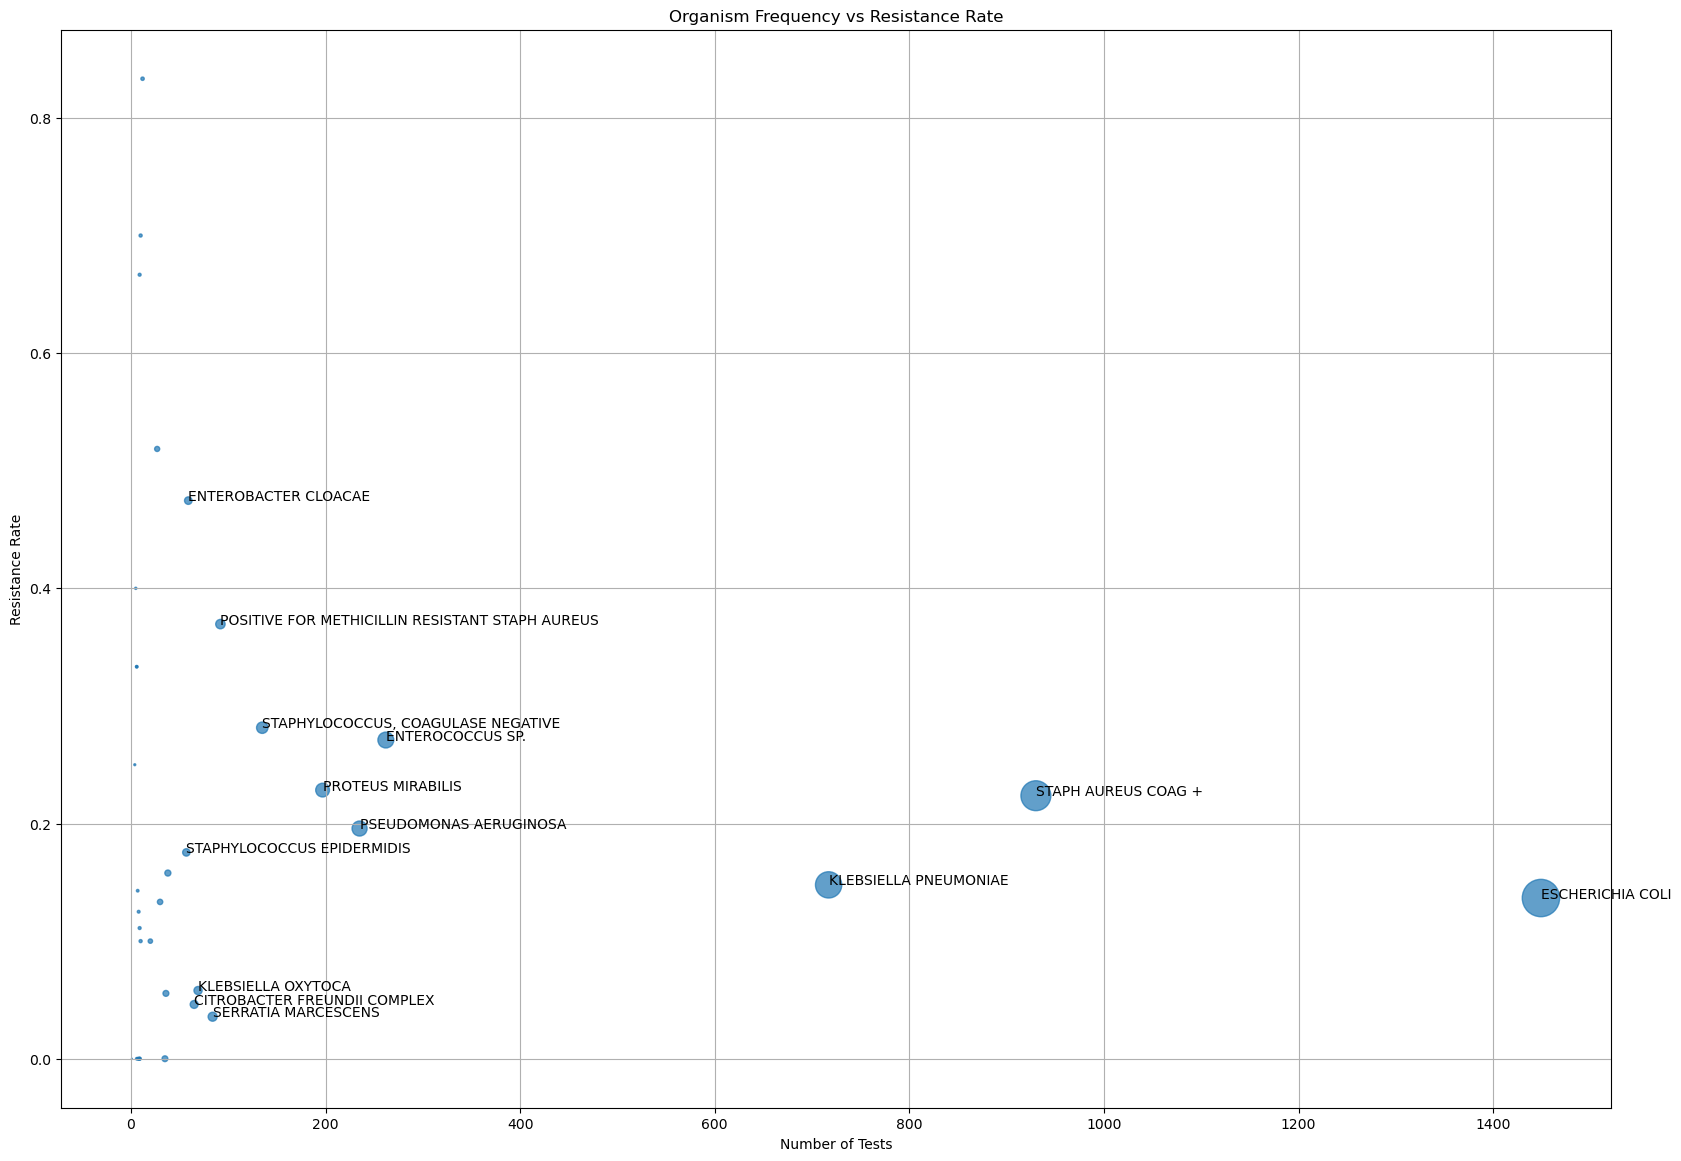

In [142]:
org_rate = model_df.groupby("org_name")["y"].mean()
org_count = model_df["org_name"].value_counts()

df_org = pd.DataFrame({
    "resistance_rate": org_rate,
    "count": org_count
}).dropna()

plt.figure(figsize=(20,14))
plt.scatter(df_org["count"], df_org["resistance_rate"], s=df_org["count"]*0.5, alpha=0.7)
for org, row in df_org.iterrows():
    if row["count"] > 50:  # annotate only common organisms
        plt.annotate(org, (row["count"], row["resistance_rate"]))

plt.xlabel("Number of Tests")
plt.ylabel("Resistance Rate")
plt.title("Organism Frequency vs Resistance Rate")
plt.grid(True)
plt.show()


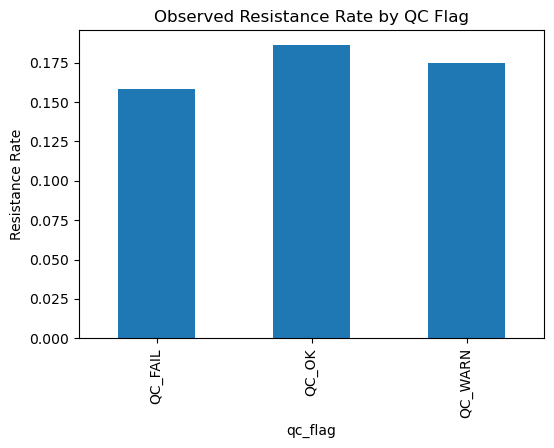

In [144]:
qc_effect = model_df.groupby("qc_flag")["y"].mean()
qc_effect

qc_effect.plot(kind="bar", figsize=(6,4))
plt.title("Observed Resistance Rate by QC Flag")
plt.ylabel("Resistance Rate")
plt.show()

In [130]:
# detect dates with > threshold of same organism occurrences
org = 'KLEBSIELLA PNEUMONIAE'
g = df[df['org_name']==org].set_index('charttime').resample('7D').size()
g[g>5]  # weeks with >5 events


charttime
2110-07-24    13
2113-05-18    13
2117-10-14    12
2118-10-27    12
2119-10-19    12
2120-01-18    13
2125-06-21    13
2126-01-10    12
2127-01-23    11
2127-03-13    12
2128-02-19    12
2129-04-07    11
2129-05-12    12
2133-07-02    13
2134-08-19    12
2135-02-24    13
2138-10-02    11
2139-01-22    11
2139-03-26    11
2140-09-22    12
2140-09-29    13
2143-08-08    20
2143-08-15    10
2145-04-22    12
2145-09-16    11
2147-05-18    13
2147-06-08    12
2148-10-03    11
2149-11-06    12
2150-03-19    26
2150-09-10    27
2154-08-01    25
2155-05-22    11
2155-08-21    13
2156-08-26    35
2156-09-02    11
2156-09-16    11
2158-04-13    12
2158-06-29    12
2160-07-03    13
2160-09-04    11
2166-10-16    11
2166-10-23    11
2167-10-08    12
2168-09-08    12
2171-07-25    12
2173-05-06    12
2173-05-13    12
2179-11-04    12
2182-07-04    14
2185-01-06    44
2189-06-25    12
2189-12-03    12
2195-01-01    12
2203-08-04    12
dtype: int64

##### Others

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'color' column
df_cleaned['interpretation_encoded'] = encoder.fit_transform(df_cleaned['interpretation'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_26248\3461992332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['interpretation_encoded'] = encoder.fit_transform(df_cleaned['interpretation'])


In [29]:
df_cleaned['interpretation'].dropna()

0        NAN
1        NAN
2        NAN
3        NAN
4        NAN
        ... 
15582    NAN
15583    NAN
15584      I
15585    NAN
15586      S
Name: interpretation, Length: 15586, dtype: string

In [30]:
df_cleaned['interpretation_encoded'].dropna()

0        1
1        1
2        1
3        1
4        1
        ..
15582    1
15583    1
15584    0
15585    1
15586    3
Name: interpretation_encoded, Length: 15586, dtype: int32

In [34]:
df_cleaned['dilution_value'].corr(df_cleaned['interpretation_encoded'])

-0.3733898243108885